### **Problem Statement**

##### - Predicting total score (Regression)
##### - Categorizing students as "high-performing" or "low-performing" (Classification)


**Import Libraries**

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
# mac
data = pd.read_csv('/Users/azel/Documents/GitHub/Azel-s-DAC-Curriculum/Internal-Project/Students_Performance.csv') 

#windows
# data = pd.read_csv('C:/Users/azelt/OneDrive/Documents/GitHub/Azel-s-DAC-Curriculum/Internal-Project/Students_Performance.csv') 

We will create a new column named "total score" so that the model will train to predict total score of students.

In [60]:
#Create total score column
data['total score'] = data['math score'] + data['reading score'] + data['writing score']

#Inspect first 5 rows to check
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


### **Linear Regression**

Features
- **Parental Level of Education**: Indicates a supportive or resource-rich learning environment
- **Test Preparation Course**: Suggests better preparedness and study habits
- **Lunch**: Better nutrition could affect academic performance???

**Implementing one-hot encoding as these features are categorical**

In [61]:
# One-hot encode categorical features
data_encoded = pd.get_dummies(data, columns=['parental level of education','lunch', 'test preparation course'], drop_first=True)


In [62]:
#Check encoded columns
print(data_encoded)

     gender race/ethnicity  math score  reading score  writing score  \
0    female        group B          72             72             74   
1    female        group C          69             90             88   
2    female        group B          90             95             93   
3      male        group A          47             57             44   
4      male        group C          76             78             75   
..      ...            ...         ...            ...            ...   
995  female        group E          88             99             95   
996    male        group C          62             55             55   
997  female        group C          59             71             65   
998  female        group D          68             78             77   
999  female        group D          77             86             86   

     total score  parental level of education_bachelor's degree  \
0            218                                           True   
1

**Define Features & Targets**

In [63]:
X = data_encoded[['parental level of education_master\'s degree', 
                  'parental level of education_bachelor\'s degree',
                  'parental level of education_high school',
                  'parental level of education_some high school',
                  'parental level of education_some college',
                  'test preparation course_none',
                  'lunch_standard']]

y = data_encoded['total score']

**Split the Data** (Training 80 / Testing 20)

In [64]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Linear Regression Model to predict a continuous value like total score**

In [65]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

**Evaluate the Model**

In [66]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 1649.229672561391
R-squared: 0.1451664116977036


**Visualization of Results**

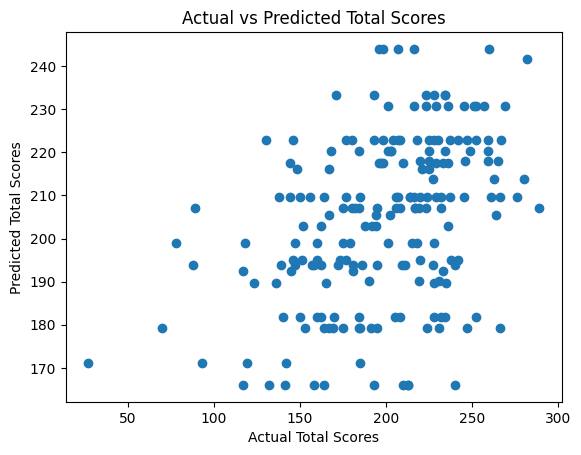

In [67]:
import matplotlib.pyplot as plt

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Total Scores")
plt.ylabel("Predicted Total Scores")
plt.title("Actual vs Predicted Total Scores")
plt.show()


In summary, the results suggest that the linear regression model isn't very effective in predicting the total score with the current features. Based on the EDA and observations, there might not be a strong linear relationship in the dataset.

==================================================================================================================================================

### **Testing feature engineering**

Combine "Parental level of education" and "Test Preparation Course" to create a new feature that reflects the interaction between them. 

In [68]:
data['education_and_prep'] = data['parental level of education'] + " - " + data['test preparation course']

In [69]:
print(data.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total score         education_and_prep  
0          218   bachelor's degree - none  
1          247   some college - completed  
2          278     m

**One-hot Encode the new feature**

In [77]:
data_encoded = pd.get_dummies(data, columns=['lunch', 'test preparation course','parental level of education', 'education_and_prep'], drop_first=False)
print(data_encoded.columns)


Index(['gender', 'race/ethnicity', 'math score', 'reading score',
       'writing score', 'total score', 'lunch_free/reduced', 'lunch_standard',
       'test preparation course_completed', 'test preparation course_none',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school',
       'education_and_prep_associate's degree - completed',
       'education_and_prep_associate's degree - none',
       'education_and_prep_bachelor's degree - completed',
       'education_and_prep_bachelor's degree - none',
       'education_and_prep_high school - completed',
       'education_and_prep_high school - none',
       'education_and_prep_master's degree - completed',
       'education_and_prep_master's degree - none',
       'education_

**Update feature set**

In [78]:
X = data_encoded[
    [
        "education_and_prep_master's degree - completed",
        "education_and_prep_bachelor's degree - completed",
        "education_and_prep_some college - completed",
        "education_and_prep_some high school - completed",
    ]
]
y = data_encoded['total score']



**Split the Dataset**

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train the Model using Random Forest Regressor**

In [80]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

**Evaluate the Model**

In [81]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1904.7379715492757
R-squared: 0.012730596541886352


**Feature Analysis**

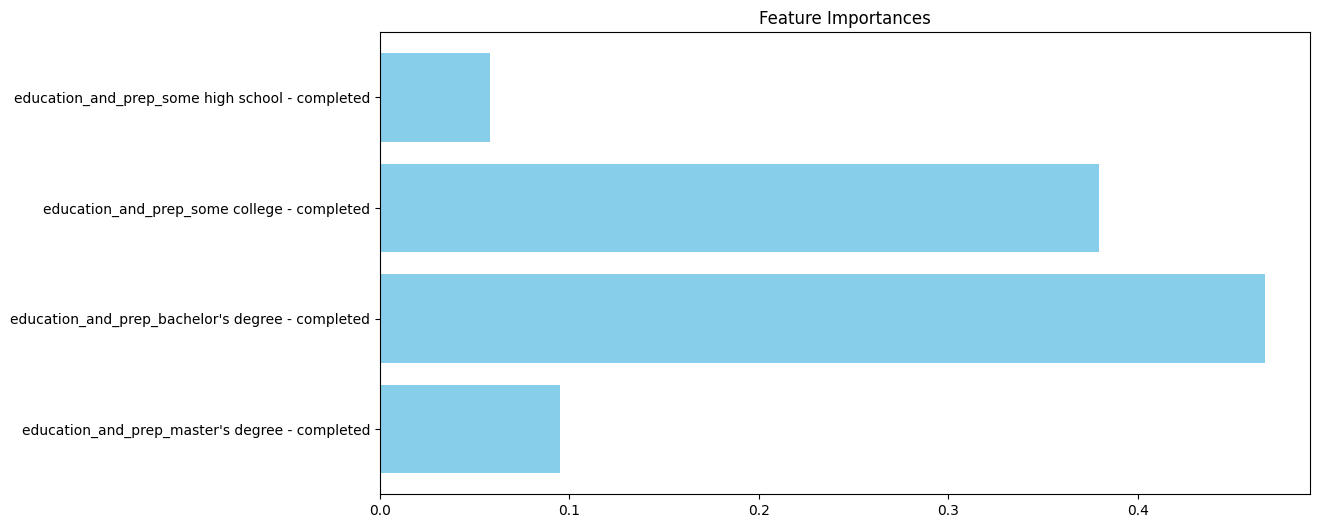

In [82]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title("Feature Importances")
plt.show()


==================================================================================================================================================

### **Random Forest Regressor**

Why?
- Handles both numerical and categorical features well
- Can capture complex, non-linear relationships
- Less prone to overfitting compared to a single decision tree

Split the Data

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features and target
X = data_encoded[['parental level of education_master\'s degree', 
                  'parental level of education_bachelor\'s degree',
                  'parental level of education_high school',
                  'parental level of education_some high school',
                  'parental level of education_some college',
                  'test preparation course_none',
                  'lunch_standard']]
y = data_encoded['total score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


Mean Squared Error: 1698.3381168032747
R-squared: 0.11971237803237733


==================================================================================================================================================

### **Gradient Boosting Regressor**

Why?
- Handles both continuous and categorical features well
- Can perform well with relatively little data if tuned correctly
- Often provides better predictive power than Random Forest, especially when dealing with complex relationships

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


Mean Squared Error: 1704.5860090631522
R-squared: 0.11647395208801359


==================================================================================================================================================

### **Support Vector Regressor (SVR)**

Why?
- Works well for high-dimensional data
- Capable of capturing non-linear relationships using the kernel trick

In [85]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor
svr_model = SVR(kernel='rbf')

# Fit the model
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


Mean Squared Error: 1749.4929386493359
R-squared: 0.09319765989144146


==================================================================================================================================================

### **K-Nearest Neighbors Regressor (KNN)**

Why?
- Non-parametric, so no assumptions are made about the underlying data distribution
- Can work well if the data has local structure and clusters

In [86]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


Mean Squared Error: 1941.6259999999997
R-squared: -0.006389315166321241
